# PREDICTION OF LITECOIN PRICES
### Approach

- EDA
- Cleaning
- PCA (Dimensionality Reduction)
- Linear Model
- Tree Based Model
- Neural Network

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import LSTM, Flatten

In [28]:
df = pd.read_csv('litecoin_csv.csv')

In [29]:
df.describe()

,txVolume(USD),adjustedTxVolume(USD),txCount,marketcap(USD),price(USD),exchangeVolume(USD),generatedCoins,fees,activeAddresses,averageDifficulty,paymentCount,medianTxValue(USD),medianFee,blockSize,blockCount
count,1.933000e+03,1.933000e+03,2501.000000,1.933000e+03,1933.000000,1.933000e+03,2501.000000,2501.000000,2501.000000,2.501000e+03,2.496000e+03,1933.000000,2496.000000,2.498000e+03,2501.000000
mean,2.356419e+08,7.148674e+07,10044.992403,1.549953e+09,29.869183,1.271590e+08,23121.359749,59.289444,30742.150740,7.851342e+05,2.600639e+04,188.777233,0.005035,6.024826e+06,589.020392
std,6.805233e+08,1.955167e+08,18523.794546,3.090979e+09,55.458961,3.581051e+08,12394.812566,100.508144,53387.535773,2.297795e+06,7.541095e+04,290.716747,0.019717,9.338370e+06,200.004198
min,4.484505e+05,3.792622e+05,0.000000,3.794370e+07,1.150000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,2.400000e+01,0.001760,0.000000,2.150000e+02,0.000000
25%,6.770141e+06,3.324057e+06,2787.000000,1.270660e+08,3.220000,1.458420e+06,14700.000000,14.755409,8434.000000,7.477859e+02,5.735000e+03,39.887661,0.000227,2.006728e+06,554.000000
50%,2.168944e+07,8.094075e+06,4189.000000,1.883810e+08,4.060000,3.238960e+06,25450.000000,29.023662,12790.000000,4.111856e+04,9.961000e+03,104.636016,0.001000,3.118158e+06,583.000000
75%,1.429053e+08,4.339836e+07,9275.000000,7.544720e+08,25.170000,6.261260e+07,29600.000000,61.269684,27227.000000,6.142155e+04,2.255300e+04,244.818000,0.001000,5.507522e+06,615.000000
max,1.175670e+10,2.535597e+09,225860.000000,1.952550e+10,359.130000,6.961680e+09,484100.000000,1283.861162,607832.000000,1.130795e+07,1.859479e+06,4586.266455,0.100000,1.091374e+08,9682.000000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2501 entries, 0 to 2500
Data columns (total 16 columns):
date                     2501 non-null object
txVolume(USD)            1933 non-null float64
adjustedTxVolume(USD)    1933 non-null float64
txCount                  2501 non-null int64
marketcap(USD)           1933 non-null float64
price(USD)               1933 non-null float64
exchangeVolume(USD)      1933 non-null float64
generatedCoins           2501 non-null float64
fees                     2501 non-null float64
activeAddresses          2501 non-null int64
averageDifficulty        2501 non-null float64
paymentCount             2496 non-null float64
medianTxValue(USD)       1933 non-null float64
medianFee                2496 non-null float64
blockSize                2498 non-null float64
blockCount               2501 non-null int64
dtypes: float64(12), int64(3), object(1)
memory usage: 312.7+ KB


## Data Cleaning

In [31]:
df.head()

,date,txVolume(USD),adjustedTxVolume(USD),txCount,marketcap(USD),price(USD),exchangeVolume(USD),generatedCoins,fees,activeAddresses,averageDifficulty,paymentCount,medianTxValue(USD),medianFee,blockSize,blockCount
0,2011-10-08,NaN,NaN,0,NaN,NaN,NaN,50.0,0.0,1,0.000244,NaN,NaN,NaN,215.0,1
1,2011-10-09,NaN,NaN,0,NaN,NaN,NaN,0.0,0.0,0,0.000000,NaN,NaN,NaN,NaN,0
2,2011-10-10,NaN,NaN,0,NaN,NaN,NaN,0.0,0.0,0,0.000000,NaN,NaN,NaN,NaN,0
3,2011-10-11,NaN,NaN,0,NaN,NaN,NaN,0.0,0.0,0,0.000000,NaN,NaN,NaN,NaN,0
4,2011-10-12,NaN,NaN,0,NaN,NaN,NaN,50.0,0.0,1,0.000244,NaN,NaN,NaN,215.0,1


In [32]:
df.isna().mean()*100

date                      0.000000
txVolume(USD)            22.710916
adjustedTxVolume(USD)    22.710916
txCount                   0.000000
marketcap(USD)           22.710916
price(USD)               22.710916
exchangeVolume(USD)      22.710916
generatedCoins            0.000000
fees                      0.000000
activeAddresses           0.000000
averageDifficulty         0.000000
paymentCount              0.199920
medianTxValue(USD)       22.710916
medianFee                 0.199920
blockSize                 0.119952
blockCount                0.000000
dtype: float64

In [33]:
df = df.dropna()

In [34]:
df.describe()

,txVolume(USD),adjustedTxVolume(USD),txCount,marketcap(USD),price(USD),exchangeVolume(USD),generatedCoins,fees,activeAddresses,averageDifficulty,paymentCount,medianTxValue(USD),medianFee,blockSize,blockCount
count,1.933000e+03,1.933000e+03,1933.000000,1.933000e+03,1933.000000,1.933000e+03,1933.000000,1933.000000,1933.000000,1.933000e+03,1933.000000,1933.000000,1933.000000,1.933000e+03,1933.000000
mean,2.356419e+08,7.148674e+07,12540.022763,1.549953e+09,29.869183,1.271590e+08,21052.142401,50.192917,38775.828246,1.015834e+06,26713.733057,188.777233,0.001968,7.288812e+06,584.829798
std,6.805233e+08,1.955167e+08,20375.323116,3.090979e+09,55.458961,3.581051e+08,7509.502282,79.396190,58308.789713,2.568589e+06,34928.708806,290.716747,0.009226,9.876390e+06,47.606973
min,4.484505e+05,3.792622e+05,2153.000000,3.794370e+07,1.150000,0.000000e+00,10250.000000,2.557964,7055.000000,3.965528e+02,4310.000000,0.001760,0.000000,1.314438e+06,367.000000
25%,6.770141e+06,3.324057e+06,3603.000000,1.270660e+08,3.220000,1.458420e+06,14425.000000,12.912709,11016.000000,2.807327e+04,8297.000000,39.887661,0.000500,2.648049e+06,558.000000
50%,2.168944e+07,8.094075e+06,5098.000000,1.883810e+08,4.060000,3.238960e+06,15775.000000,26.548365,15989.000000,4.917526e+04,12735.000000,104.636016,0.001000,3.700133e+06,583.000000
75%,1.429053e+08,4.339836e+07,12540.000000,7.544720e+08,25.170000,6.261260e+07,28850.000000,55.198791,38144.000000,1.022669e+05,25987.000000,244.818000,0.001000,7.172459e+06,611.000000
max,1.175670e+10,2.535597e+09,225860.000000,1.952550e+10,359.130000,6.961680e+09,39150.000000,944.555799,607832.000000,1.130795e+07,311207.000000,4586.266455,0.100000,1.091374e+08,913.000000


## EDA

In [35]:
## Plotting Price Over Time ##

In [36]:
df['date']= pd.to_datetime(df['date']) 

In [37]:
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month

In [38]:
df.groupby(['month']).mean()

,txVolume(USD),adjustedTxVolume(USD),txCount,marketcap(USD),price(USD),exchangeVolume(USD),generatedCoins,fees,activeAddresses,averageDifficulty,paymentCount,medianTxValue(USD),medianFee,blockSize,blockCount,year
month,,,,,,,,,,,,,,,,
1,4.712959e+08,1.425954e+08,25297.574194,2.595051e+09,50.371419,2.004380e+08,20013.235887,68.534515,71806.896774,7.794020e+05,45295.980645,418.091710,0.001543,1.274570e+07,574.922581,2016.000000
2,2.138655e+08,7.970542e+07,15045.496454,2.186073e+09,41.741844,2.007939e+08,20110.139628,38.703358,47602.368794,9.661744e+05,32903.950355,145.828499,0.000812,8.588129e+06,577.765957,2016.000000
3,9.027130e+07,4.014361e+07,11157.625806,2.079771e+09,39.356129,1.095758e+08,20542.741935,23.946198,40364.174194,1.170692e+06,28989.806452,111.756994,0.000855,7.366226e+06,584.496774,2016.000000
4,8.615037e+07,3.443743e+07,10382.614379,1.678256e+09,31.548235,9.111152e+07,20672.875784,31.590497,37785.725490,1.499848e+06,29115.346405,135.622398,0.002814,6.934763e+06,586.346405,2015.941176
5,9.531309e+07,3.693344e+07,10766.801075,1.650422e+09,31.079086,1.041973e+08,21953.225266,85.392283,36200.575269,1.752065e+06,26640.876344,150.026119,0.006580,7.098096e+06,586.155914,2015.500000
6,1.350640e+08,3.837641e+07,10079.761111,1.388412e+09,26.340389,1.311231e+08,22003.628250,59.902396,34011.266667,1.822856e+06,24280.111111,189.249966,0.003278,6.587250e+06,583.861111,2015.500000
7,1.423310e+08,3.852173e+07,10042.295699,1.296244e+09,24.577581,1.098075e+08,22083.971774,41.944422,32761.311828,1.696180e+06,23261.688172,238.501997,0.000753,6.763455e+06,588.569892,2015.500000
8,1.320649e+08,2.920293e+07,8758.814371,8.709097e+08,17.058084,6.619130e+07,22116.467066,40.872733,25911.658683,7.919171e+05,17924.455090,180.691450,0.001139,5.194244e+06,581.940120,2015.215569
9,1.759609e+08,4.799248e+07,7841.606667,7.379576e+08,14.829267,1.077752e+08,20456.916667,31.842497,22475.066667,1.818413e+05,16063.380000,158.710964,0.000996,4.441158e+06,585.406667,2015.000000


What do these terms mean?

Reference: https://cryptocurrencyfacts.com/a-quick-guide-to-cryptocurrency-terms/


In [39]:
import seaborn as sns

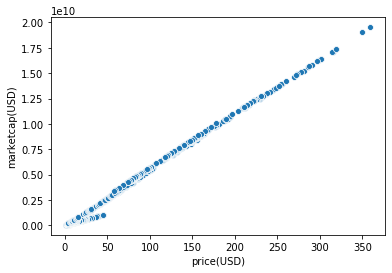

In [40]:
ax = sns.scatterplot(x="price(USD)", y="marketcap(USD)", data=df)

We observe perfect positive correlation with respect to market capitalization.

This is because marketcap = total coins in circulation * price per coin

In [41]:
df.head()

,date,txVolume(USD),adjustedTxVolume(USD),txCount,marketcap(USD),price(USD),exchangeVolume(USD),generatedCoins,fees,activeAddresses,averageDifficulty,paymentCount,medianTxValue(USD),medianFee,blockSize,blockCount,year,month
568,2013-04-28,4.431952e+07,2.556844e+06,9174,73773400.0,4.30,0.0,31600.0000,594.357571,17216,435.055742,9658.0,174.635608,0.1,4079010.0,632,2013,4
569,2013-04-29,3.647810e+07,2.111820e+06,9275,74952704.0,4.37,0.0,32500.0000,634.409741,18395,437.937821,9542.0,181.679890,0.1,4977931.0,650,2013,4
570,2013-04-30,4.039166e+07,1.969543e+06,9099,75726800.0,4.40,0.0,31350.0000,792.170373,17810,437.937821,9301.0,167.863647,0.1,5349282.0,627,2013,4
571,2013-05-01,7.637420e+07,4.691922e+06,8990,73901200.0,4.29,0.0,31699.9795,639.972367,16991,471.122764,9326.0,177.125873,0.1,4463820.0,634,2013,5
572,2013-05-02,1.163151e+07,2.501720e+06,8031,65242700.0,3.78,0.0,26150.0000,528.803594,15769,482.512511,8269.0,155.490420,0.1,4088911.0,523,2013,5


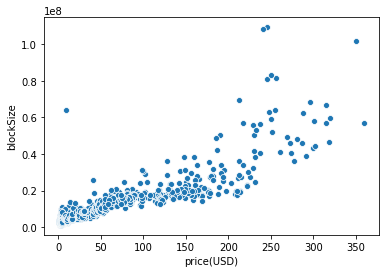

In [42]:
ax = sns.scatterplot(x="price(USD)", y="blockSize", data=df)

Increase in block size yields higher coin prices.

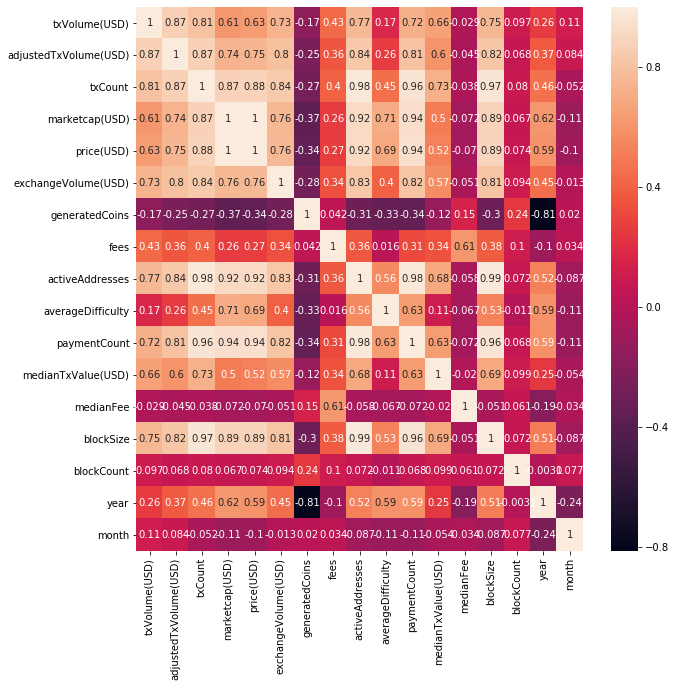

In [43]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))  
ax = sns.heatmap(df.corr(),annot=True)

We observe features which are highly correlated with the label.

### Feature Selection using PCA

In [20]:
from sklearn.decomposition import PCA
df = df.drop('price(USD)',1)
df = df.drop('date',1)

In [21]:
# normalize data

from sklearn import preprocessing

data_scaled = pd.DataFrame(preprocessing.scale(df),columns = df.columns) 

//anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [22]:
pca = PCA(n_components = 2,whiten=True)
pca.fit(data_scaled)
variance = pd.DataFrame(pca.explained_variance_ratio_)
np.cumsum(pca.explained_variance_ratio_)

array([0.51720439, 0.65489817])

In [23]:
components = pd.DataFrame(pca.components_, columns = df.columns, index=[1, 2])
components

,txVolume(USD),adjustedTxVolume(USD),txCount,marketcap(USD),exchangeVolume(USD),generatedCoins,fees,activeAddresses,averageDifficulty,paymentCount,medianTxValue(USD),medianFee,blockSize,blockCount,year,month
1,0.280546,0.302814,0.338362,0.319632,0.302511,-0.136077,0.131825,0.341476,0.193328,0.339062,0.242666,-0.017662,0.336641,0.026837,0.206779,-0.024238
2,0.217646,0.130945,0.077965,-0.108102,0.055145,0.419074,0.449692,0.016658,-0.311710,-0.043452,0.186632,0.363860,0.030417,0.200630,-0.447534,0.169746


In [24]:
import math

T = pca.transform(data_scaled)

def get_important_features(transformed_features, components_, columns):
    """
    This function will return the most "important" 
    features so we can determine which have the most
    effect on multi-dimensional scaling
    """
    num_columns = len(columns)

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    # Sort each column by it's length. These are your *original*
    # columns, not the principal components.
    important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print ("Features by importance:\n", important_features)

get_important_features(T, pca.components_, df.columns.values)

Features by importance:
 [(3.837994207717329, 'year'), (3.56922810186436, 'fees'), (3.36852371697012, 'generatedCoins'), (3.13185171893568, 'txCount'), (3.107958363579247, 'activeAddresses'), (3.1005731077905687, 'paymentCount'), (3.069919428182088, 'blockSize'), (3.026031698356524, 'txVolume(USD)'), (3.0170614898497745, 'marketcap(USD)'), (2.922678424147081, 'adjustedTxVolume(USD)'), (2.9191725853849775, 'averageDifficulty'), (2.781822079523552, 'exchangeVolume(USD)'), (2.7249348407234963, 'medianFee'), (2.610925744384486, 'medianTxValue(USD)'), (1.5196270470263187, 'blockCount'), (1.2880103586808151, 'month')]


In [132]:
result_metrics = pd.DataFrame()
def show_metric(clf,y_test,y_pred2):
    global result_metrics
    
    
    MAE = metrics.mean_absolute_error(y_test, y_pred2)
    MSE = metrics.mean_squared_error(y_test, y_pred2)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred2))
    R2 = r2_score(y_test, y_pred2)
    data = {'CLF':clf,'MAE': MAE, 'MSE': MSE, 'RMSE':RMSE, 'R2':R2}
    
    
    
    result_metrics = result_metrics.append(data,ignore_index=True)
    
    #result_metrics.drop_duplicates(subset ="CLF", keep = False, inplace = True) 
    return result_metrics


In [44]:
X = data_scaled[['year','fees','generatedCoins','txCount','activeAddresses','paymentCount','blockSize','txVolume(USD)','marketcap(USD)']]
Y = df['price(USD)']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

### Building Regression Models

##### Linear Model (Ridge Regression)

Using grid search for various alpha values

In [142]:
lm = Ridge()

In [143]:
parameters = {'alpha':[0.1,1.0, 10.0]}

In [144]:
clf = GridSearchCV(lm, parameters, cv=5)

In [145]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None, param_grid={'alpha': [0.1, 1.0, 10.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [146]:
clf = clf.best_estimator_

In [147]:
#y_pred = regressor.predict(X_test)
y_pred2 = clf.predict(X_test)

In [148]:
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred2})
predictions.head()

,Actual,Predicted
1528,3.64,4.055988
1696,4.63,4.294846
1059,4.86,6.019989
2130,45.17,43.440410
2257,212.46,222.999603


R-Score of 0.99 indicates that 99% of the variation in y_test is due to variation in y_pred2.

This is a highly accurate result.

Since RMSE of training data and test data is very close, we may conclude that the model fits the data well.

Predictions are off by about ~$2.50.

In [149]:
show_metric(clf,y_test,y_pred2)

,CLF,MAE,MSE,R2,RMSE
0,<keras.wrappers.scikit_learn.KerasRegressor ob...,0.743786,1.305179,0.999538,1.142444
1,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",1.837188,8.751282,0.996902,2.958257


##### Tree Based Model (Random Forest Regression)

Performing feature selection again using Random Forest Feature Importance.

In [150]:
rf= RandomForestRegressor(max_features = 4)
rf.fit(X_train,y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=4, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [151]:
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(4)

marketcap(USD)     0.449612
paymentCount       0.315640
activeAddresses    0.099619
blockSize          0.084244
dtype: float64

Using top 4 important features only.

In [152]:
X_train_rf = X_train[['marketcap(USD)','activeAddresses','paymentCount','blockSize']]

In [153]:
rf.fit(X_train_rf,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=4, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [154]:
y_pred_rf = rf.predict(X_test[['marketcap(USD)','activeAddresses','paymentCount','blockSize']])

In [155]:
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
predictions.head()

,Actual,Predicted
1528,3.64,3.822
1696,4.63,5.198
1059,4.86,4.452
2130,45.17,45.461
2257,212.46,210.333


In [156]:
show_metric(rf,y_test,y_pred_rf)

,CLF,MAE,MSE,R2,RMSE
0,<keras.wrappers.scikit_learn.KerasRegressor ob...,0.743786,1.305179,0.999538,1.142444
1,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",1.837188,8.751282,0.996902,2.958257
2,"(DecisionTreeRegressor(criterion='mse', max_de...",0.655411,1.979305,0.999299,1.406878


##### Neural Network Model

In [61]:
X_train.shape

(1546, 9)

In [134]:
# define model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(20, input_dim=9, kernel_initializer='normal', activation='relu'))
    model.add(Dense(10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.summary()
    return model



In [135]:
from keras.wrappers.scikit_learn import KerasRegressor

estimator = KerasRegressor(build_fn=create_model, epochs=100, batch_size=5, verbose=1)


In [136]:
history = estimator.fit(X_train,y_train)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 20)                200       
_________________________________________________________________
dense_27 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 11        
Total params: 421
Trainable params: 421
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1546/1546 [==============================] - 1s 426us/step - loss: 3573.2323
Epoch 2/100
1546/1546 [==============================] - 0s 139us/step - loss: 984.0312
Epoch 3/100
1546/1546 [==============================] - 0s 159us/step - loss: 296.2683
Epoch 4/100
1546/1546 [==============================] - 0s 142us/step - loss: 249.4541
Epoch 5/100
1546/1546 [=========

1546/1546 [==============================] - 0s 138us/step - loss: 0.8902
Epoch 87/100
1546/1546 [==============================] - 0s 141us/step - loss: 0.7397
Epoch 88/100
1546/1546 [==============================] - 0s 141us/step - loss: 0.7044
Epoch 89/100
1546/1546 [==============================] - 0s 140us/step - loss: 0.6690
Epoch 90/100
1546/1546 [==============================] - 0s 137us/step - loss: 0.8378
Epoch 91/100
1546/1546 [==============================] - 0s 134us/step - loss: 0.8830
Epoch 92/100
1546/1546 [==============================] - 0s 139us/step - loss: 0.5440
Epoch 93/100
1546/1546 [==============================] - 0s 136us/step - loss: 0.4978
Epoch 94/100
1546/1546 [==============================] - 0s 143us/step - loss: 0.7189
Epoch 95/100
1546/1546 [==============================] - 0s 138us/step - loss: 0.5793
Epoch 96/100
1546/1546 [==============================] - 0s 140us/step - loss: 1.0467
Epoch 97/100
1546/1546 [==============================] 

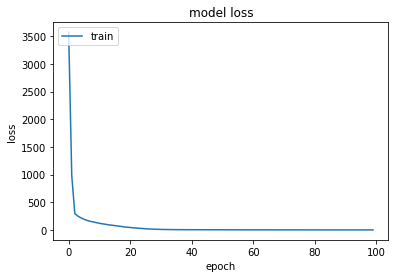

In [137]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [141]:
y_pred_nn = estimator.predict(X_test)

387/387 [==============================] - 0s 71us/step


In [139]:
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_nn})
predictions.head()

,Actual,Predicted
1528,3.64,3.676669
1696,4.63,4.547866
1059,4.86,4.285226
2130,45.17,44.059883
2257,212.46,210.540848


In [140]:
show_metric(estimator,y_test,y_pred_nn)

,CLF,MAE,MSE,R2,RMSE
0,<keras.wrappers.scikit_learn.KerasRegressor ob...,0.743786,1.305179,0.999538,1.142444


## Results

In [157]:
result_metrics

,CLF,MAE,MSE,R2,RMSE
0,<keras.wrappers.scikit_learn.KerasRegressor ob...,0.743786,1.305179,0.999538,1.142444
1,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",1.837188,8.751282,0.996902,2.958257
2,"(DecisionTreeRegressor(criterion='mse', max_de...",0.655411,1.979305,0.999299,1.406878


The multilayer perceptron achieves the least RMSE and closes R^2 value to 1.

Hence, being the most efficient for this problem.